# Python and R

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')
library(dplyr)


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python and filters down to presidential general election polls only:

In [5]:

df = pd.read_csv('raw-polls.csv')
df

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,Live Phone,NaN,10/13/98,364.0,Peter Vallone,13080,DEM,26.0,George Pataki,13083,REP,57.0,9.0,-31.0,11/3/98,33.16,54.32,-21.15,-9.85,1.0,for New York Daily News | WABC-TV (New York)
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,Live Phone,NaN,10/13/98,540.0,Lee Fisher,13085,DEM,37.0,Bob Taft,13086,REP,52.0,NaN,-15.0,11/3/98,44.69,50.05,-5.36,-9.64,1.0,NaN
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,Live Phone,D,10/13/98,488.0,Harry Reid,3964,DEM,49.0,John Ensign,3965,REP,44.0,NaN,5.0,11/3/98,47.86,47.77,0.09,4.91,1.0,for unspecified Democratic sponsor
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,Live Phone,NaN,10/13/98,364.0,Charles E. Schumer,3966,DEM,44.0,Alfonse M. D'Amato,3967,REP,52.0,NaN,-8.0,11/3/98,54.62,44.08,10.54,-18.54,0.0,for New York Daily News | WABC-TV (New York)
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,Live Phone,D,10/13/98,902.0,Charles E. Schumer,3966,DEM,46.0,Alfonse M. D'Amato,3967,REP,42.0,NaN,4.0,11/3/98,54.62,44.08,10.54,-6.54,1.0,for Charles E. Schumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,74006,138846,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Trafalgar Group,338,IVR/Online/Text,R,1/3/21,1056.0,Raphael Warnock,14489,DEM,48.4,Kelly Loeffler,13671,REP,49.7,NaN,-1.3,1/5/21,51.04,48.96,2.08,-3.38,0.0,for unspecified Republican sponsor
10772,73993,138823,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,AtlasIntel,546,Live Phone/Online,NaN,1/3/21,857.0,Jon Ossoff,14567,DEM,51.3,David A. Perdue,14568,REP,46.8,NaN,4.5,1/5/21,50.61,49.39,1.23,3.27,1.0,NaN
10773,73991,138819,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,National Research Inc.,225,Live Phone,R,1/3/21,500.0,Jon Ossoff,14567,DEM,46.0,David A. Perdue,14568,REP,45.0,NaN,1.0,1/5/21,50.61,49.39,1.23,-0.23,1.0,for unspecified Republican sponsor
10774,73992,138821,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,Opinion Savvy/InsiderAdvantage,243,IVR/Live Phone,NaN,1/3/21,500.0,Jon Ossoff,14567,DEM,48.6,David A. Perdue,14568,REP,48.7,NaN,-0.1,1/5/21,50.61,49.39,1.23,-1.33,0.0,for Fox 5 Atlanta


The cell below loads the same data in R and applies the same filter:

In [6]:
%%R

df <- read_csv('raw-polls.csv') 
df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Example Charts

Here are some very basic charts to get you started at looking at how far off these polls have been relative to the actual results of elections (`bias` variable). You will probably need to modify them significantly to get anything meaningful out of your exploratory dataviz. Think about which variables you might need to facet on the histogram (or what you might want to set the y axis to on the dotplot). 

note: This section is just example charts. You don't have to do anything here, just leave these charts as a starting point for you to copy/paste later. Scroll to the next section to get down to work!


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


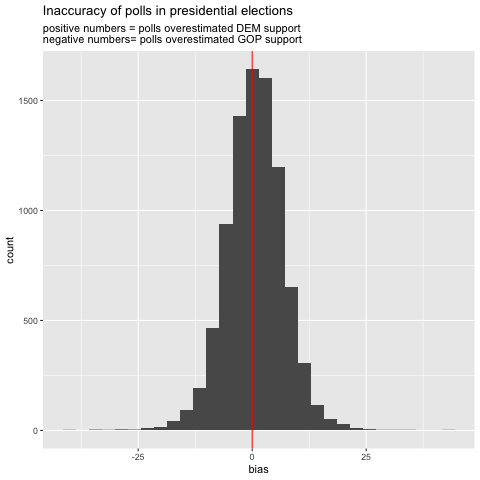

In [7]:
%%R 

ggplot(df) +
    geom_histogram(aes(x=bias)) +
    geom_vline(aes(xintercept=0), color='red') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )


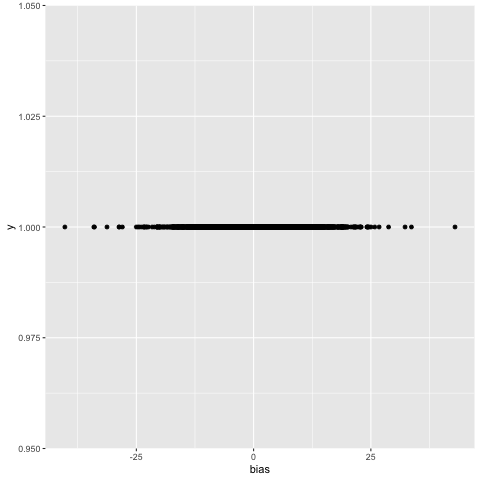

In [8]:
%%R 

ggplot(df) +
    aes(x=bias, y=1) + 
    geom_point() 

# Exploratory Data Visualization

In this section you'll make a few charts to explore the data. For each chart, write a short explanation of what you think you can and cannot conclude from the chart.

### Exploratory chart 1

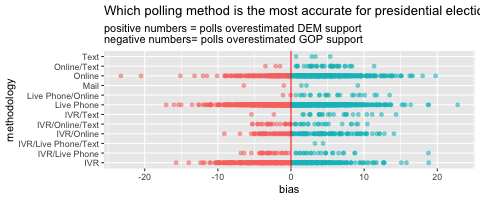

In [13]:
%%R -h 200


df_pres_general <- df %>% filter(type_simple=='Pres-G')

ggplot(df_pres_general) +
    aes(x=bias, y=methodology, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Which polling method is the most accurate for presidential elections?',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")



👉 Summary

_Replace this text with your summary of the chart above. Be very careful with your language. Use language that is as conclusive as you can make it, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far._

👉 Reflection

What I can conclude based on this chart:
- It appears that IVR is the most accurate polling method. LivePhone comes nexr, but it has more margin of error.
- Online polling is the least accurate, and it tens to be DEM biased.
- Mail seems to have a balanced polling method with regards to both parties.
- Text is overtly biased.

What I can't conclude based on this chart:
* Why online pollint is more biased to DEM result.
* Are text and online polling equally unreliable?
* I can't explain why IVR/Live Phone/Text is biased towards DEM?



### Exploratory chart 2

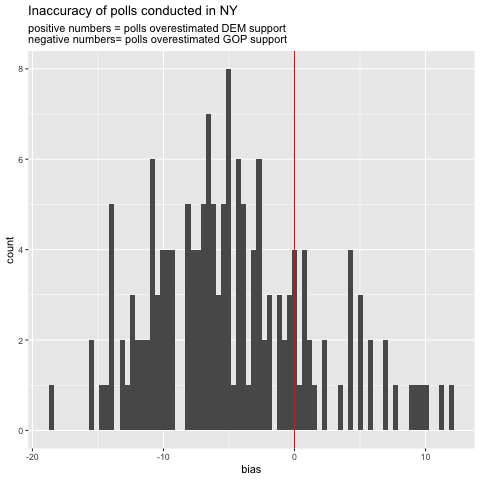

In [11]:
%%R

df_pres_general <- df %>% 
    filter(location=='NY') # Filter data to polls in presidential general elections only

# a basic histogram
ggplot(df_pres_general) +
    aes(x=bias) +
    geom_histogram(bins=80) +
    geom_vline(aes(xintercept=0), color='red') +
    labs(
        title='Inaccuracy of polls conducted in NY',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
    )

👉 Summary

_Replace this text with your summary of the chart above. Be very careful with your language. Use language that is as conclusive as you can make it, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far._

👉 Reflection

What I can conclude based on this chart:
* The distribution slightly skews right.
* The polls shows a strong tendency of being biased toward GOP.

What I can't conclude based on this chart:
* We are uncertiain which poller is the most accurate in NY.
* We are uncertain what have caused the bias towards GOP in all polls.
* We are unsure if the poll have become more or less accurate through the years.



### Exploratory chart 3

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


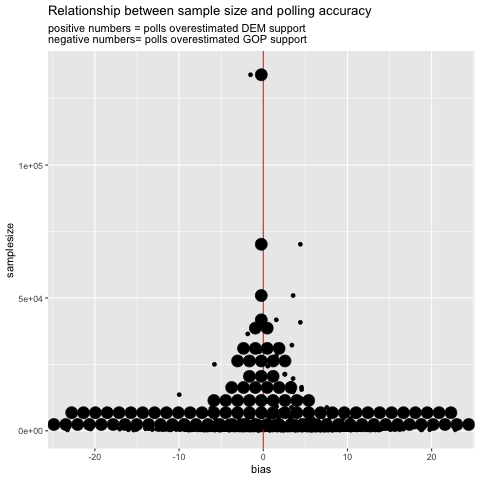

In [19]:
%%R

ggplot(df_pres_general) +
    aes(x=bias, y=samplesize) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='red') +
    geom_dotplot(binaxis = "y", stackdir =
"center") +
    labs(
        title='Relationship between sample size and polling accuracy',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )





# 👉 Chart 2
# Insert code for a ggplot chart below


👉 Summary

_Replace this text with your summary of the chart above. Be very careful with your language. Use language that is as conclusive as you can make it, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far._

👉 Reflection

What I can conclude based on this chart:
* This plot is relatively difficult to understand. It seems that when the sample size is below 2500, the larger the sample size, more accurate the poll will be.
* However, The four outliers in sample sizes are not accurate at all.
* 

What I can't conclude based on this chart:
* We cannot determine if the inaccuracy of the four outliers are because they are presidential elections.
* We cannot determine if the correlation of sample size and accuracy have a causation.



# New Questions

Good exploratory viz generates some answers, but usually lots of new questions. 
What new questions do you have now that you've had a chance to do some exploration with the data?

👉 I am interested in knowing more about the pollster rating in the database. Who ranked them? How is it rated? Does the higher rating one really being more accurate than those lower rating ones?